In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
path = r'/Users/jakubkondelka/Documents/CF_Instacart Basket Analysis'

In [3]:
dataset = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products_49_part1.pkl'))

In [4]:
dataset.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,77,7,9.0,both,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,77,7,9.0,both,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,120,16,12.6,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,120,16,12.6,both,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer


In [5]:
dataset.info

<bound method DataFrame.info of           user_id first_name last_name  gender     state  age date_joined  \
0           26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
1           26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
2           26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
3           26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
4           26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
...           ...        ...       ...     ...       ...  ...         ...   
32404854    80148    Cynthia     Noble  Female  New York   55    4/1/2020   
32404855    80148    Cynthia     Noble  Female  New York   55    4/1/2020   
32404856    80148    Cynthia     Noble  Female  New York   55    4/1/2020   
32404857    80148    Cynthia     Noble  Female  New York   55    4/1/2020   
32404858    80148    Cynthia     Noble  Female  New York   55    4/1/2020   

          n_dependants fam_status  income  

# Question 3 - Histogram of order_hour_of_day

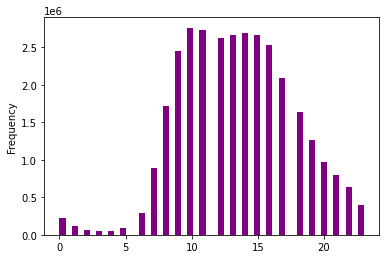

In [69]:
hist2 = dataset['order_hour_of_day'].plot.hist(bins = 50, color = 'purple')

In [10]:
dataset['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [16]:
dataset['order_hour_of_day'].value_counts()[0]

218769

In [18]:
# checking null values, because of the 0 orders during certain times in Histogram
dataset.isnull().sum()

user_id                         0
first_name                      0
last_name                       0
gender                          0
state                           0
age                             0
date_joined                     0
n_dependants                    0
fam_status                      0
income                          0
order_id                        0
evaluations                     0
order_number                    0
orders_day_of_week              0
order_hour_of_day               0
days_since_prior_order    2076096
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
prices                          0
_merge                          0
price_range_loc                 0
busiest day                     0
Busiest days                    0
Busiest_period_of_day           0
max_order                       0
loyalty_flag  

In [19]:
dataset['order_hour_of_day'].isna().sum()

0

#### This histogram provides a frequency of orders during a day. We can see that it logically corresponds with expected peak during the day and less orders in early morning, evening and during the night

# Question 4 - Bar chart

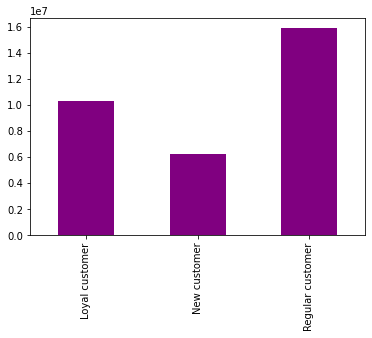

In [68]:
bar2 = dataset['loyalty_flag'].value_counts().sort_index().plot.bar(color = 'purple')

### Regular customers are the most loyal 

# Question 5 - Line chart and sampling

In [54]:
# assing random numbers between 0 and 1 to all rows . Than we create a variable dev and asign it all numbers smaller than 0.7 (70%)
np.random.seed(4)
dev = np.random.rand(len(dataset)) <= 0.7

In [56]:
# with Boolean functions, I will asign 70% of sample to 'big' variable and 30% to 'small' variable
big = dataset[dev]
small = dataset[~dev]

In [50]:
# check lenghts 
len(dataset)

32404859

In [57]:
len(big) + len(small)

32404859

In [58]:
# select only the 30% of data for a line chart 
df_2 = small[['order_hour_of_day','prices']]

In [59]:
df_2

,order_hour_of_day,prices
0,9,9.0
2,15,9.0
3,9,12.6
6,8,12.6
10,11,4.3
...,...,...
32404841,19,12.2
32404842,19,6.5
32404843,19,14.6
32404849,16,1.2


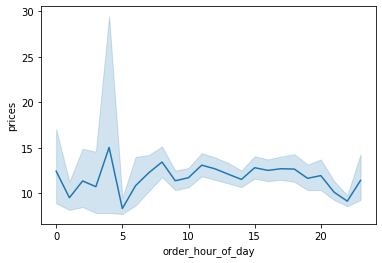

In [60]:
# create a line chart with the sample
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

#### customers seem to spend for highest priced items in the early mornings, around 4am. The spending is constant during the day, dropping to less pricier items after 8pm

# Question 6 - Connection betweeen age and number of dependents.

In [62]:
# I will use the same sample data as above to create the line chart 
# First, I will create a subset dataset

df_3 = small[['age','n_dependants']]

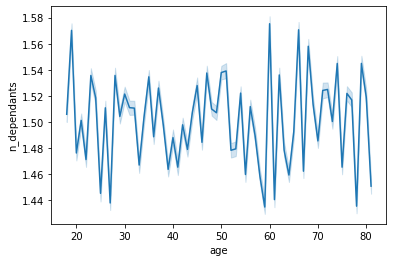

In [63]:
# create line chart 
line2 = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants')

In [65]:
df_4 = big[['age','n_dependants']]

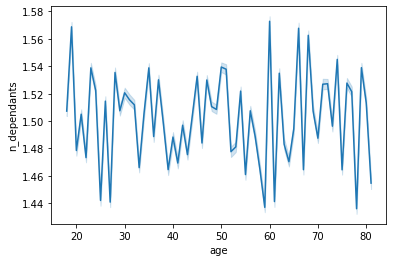

In [66]:
line3 = sns.lineplot(data = df_4, x = 'age',y = 'n_dependants')

#### the graph shows spike at the age of 50, being where there are the most dependents. There is a trend of number of dependants declining up to that age. Also, after the spike, the trend declines again. In my opinion it is strange that n of dependants is this very spikey

# Question 7 - Scatterplot . Age and Income

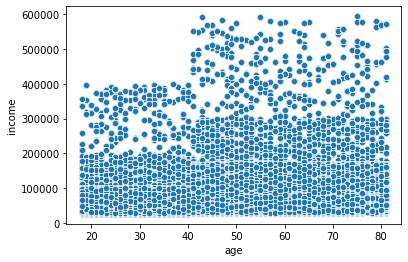

In [67]:
# Prices against themselves so that I can see potential outliers
scatter2 = sns.scatterplot(x = 'age', y = 'income',data = dataset)

#### We can see that majority of 40 plus has higher income than younger than 40. 300k vs 200k. 
#### Max income of <40 is less than 400k. That means that some of the <40 have higher income than majority of 40+
#### Few in the 40+ group have income up to 600k

# Exporting chart pictures

In [70]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyalty_flag.png'))

In [71]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_oOFday.png'))

In [72]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'prices_oOFday.png'))

In [73]:
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_dependants.png'))

In [74]:
scatter2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scatter_age_income.png'))